# CycleGAN

## What is the CycleGAN?

![cyclegan](https://miro.medium.com/max/1400/1*5DG4hHjxAyWTfV1J3mRH_A.png)

Paper : https://arxiv.org/abs/1703.10593


CycleGAN was introduced in the now well-known 2017 paper out of Berkeley, Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks. It was interesting because it did not require paired training data — while an x and y set of images are still required, they do not need to directly correspond to each other. In other words, if you wanted to translate between sketches and photos, you still need to train on a bunch of sketches and a bunch of photos, but the sketches would not need to be of the exact photos in your dataset.



## Dataset : Apple 2 Orange
link : https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/

## About dataset
- Download size: 74.82 MiB
- Split
    - 'testA'  =	266
    - 'testB'  =	248
    - 'trainA' =	995
    - 'trainB' =	1,019

    

![img](https://storage.googleapis.com/tfds-data/visualization/cycle_gan-apple2orange-2.0.0.png)




In [0]:
%tensorflow_version 1.x

In [9]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [10]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN2 import CycleGAN
from utils.loaders import DataLoader

Using TensorFlow backend.


In [0]:
# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

In [0]:
# if a folder does not exist
!mkdir -p run/paint/0001_apple2orange/weights

In [0]:
# if a folder does not exist
!mkdir -p run/paint/0001_apple2orange/viz

In [0]:
# if a folder does not exist
!mkdir -p run/paint/0001_apple2orange/images

mode =  'build'

# Load Data

In [0]:
IMAGE_SIZE = 128

In [0]:
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

# Architecture

In [0]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0012
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Train

In [0]:
BATCH_SIZE = 1
EPOCHS = 3
PRINT_EVERY_N_BATCHES = 30

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'


In [0]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[Epoch 0/3] [Batch 0/995] [D loss: 1.327779, acc:  37%] [G loss: 15.416828, adv: 1.407579, recon: 1.121112, id: 1.399065] time: 0:00:00.538017 
[Epoch 0/3] [Batch 1/995] [D loss: 0.656230, acc:  43%] [G loss: 15.088008, adv: 1.260798, recon: 1.121936, id: 1.303923] time: 0:00:01.049530 
[Epoch 0/3] [Batch 2/995] [D loss: 0.640807, acc:  42%] [G loss: 14.592467, adv: 1.265521, recon: 1.031738, id: 1.504781] time: 0:00:01.709940 
[Epoch 0/3] [Batch 3/995] [D loss: 0.538280, acc:  38%] [G loss: 13.480707, adv: 1.098441, recon: 0.954553, id: 1.418370] time: 0:00:02.253948 
[Epoch 0/3] [Batch 4/995] [D loss: 0.598948, acc:  31%] [G loss: 17.709019, adv: 1.101335, recon: 1.325047, id: 1.678605] time: 0:00:02.810955 
[Epoch 0/3] [Batch 5/995] [D loss: 0.459846, acc:  39%] [G loss: 14.039440, adv: 0.984982, recon: 0.994131, id: 1.556574] time: 0:00:03.450699 
[Epoch 0/3] [Batch 6/995] [D loss: 0.430369, acc:  40%] [G loss: 13.462899, adv: 1.327321, recon: 0.897478, id: 1.580400] time: 0:00:13.

# Loss visualization

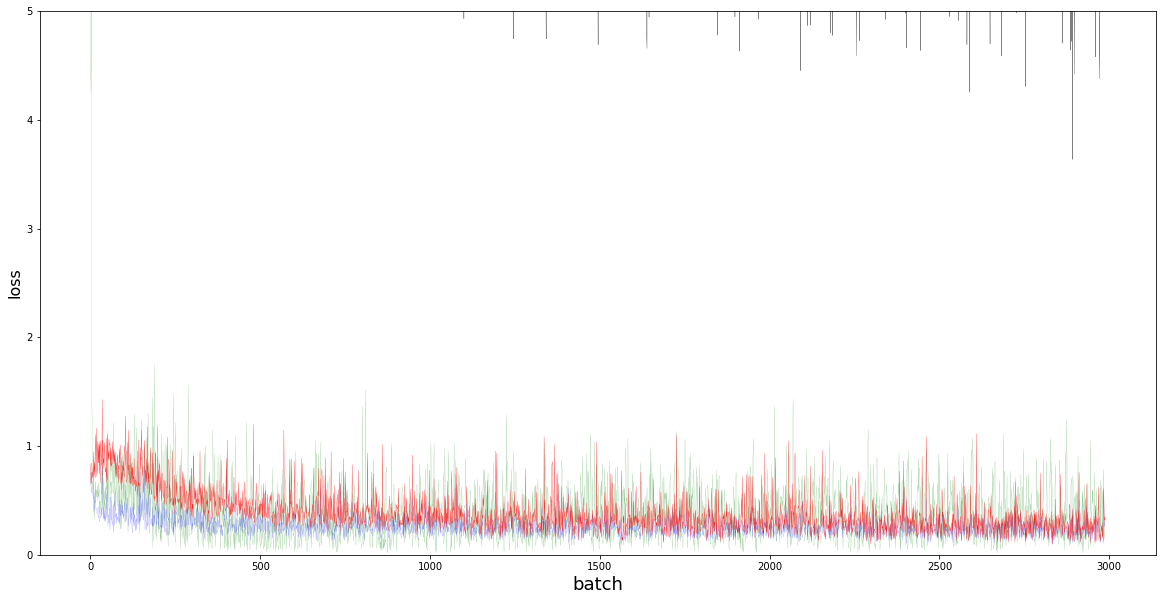

In [0]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

# Visualize the results

In [150]:
from glob import glob

path = '/content/gdrive/My Drive/Colab Notebooks/CycleGAN/run/paint/0001_apple2orange/images/'

path_list = glob(os.path.join(path, '*.png'))
print('path list length :', len(path_list))

path list length : 198


In [0]:
import cv2
import numpy as np

def show_image(path):
    
    img = path_list[path]
    img = cv2.imread(img)

    # openCV --> BGR, Matplotlib --> RGB
    b, g, r = cv2.split(img)   # split b,g,r from images
    img = cv2.merge([r,g,b]) # convert b to r and merge

    plt.imshow(img)
    plt.show()
    
    return path_list[path]

0


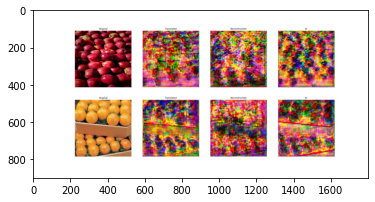

15


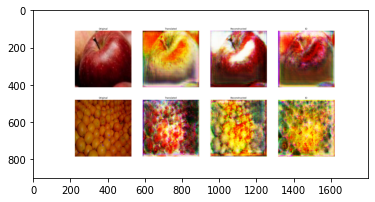

30


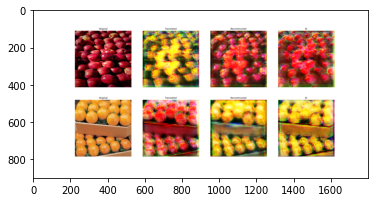

45


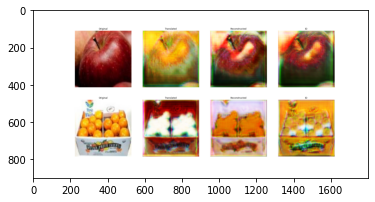

60


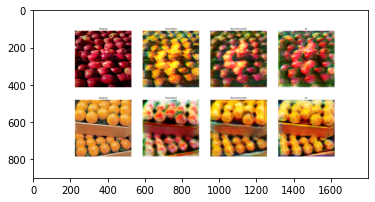

75


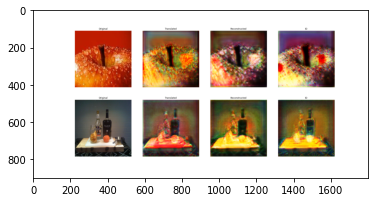

90


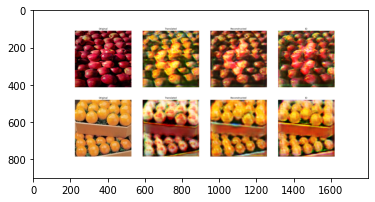

105


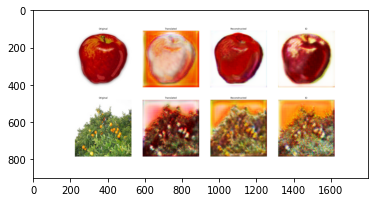

120


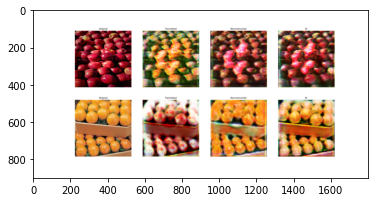

135


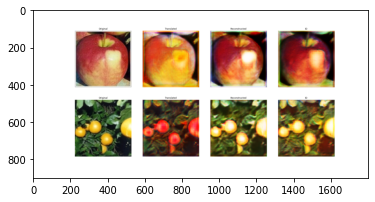

150


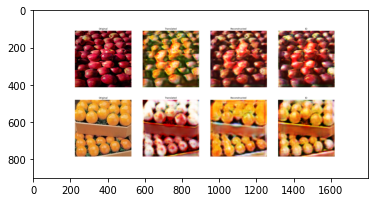

165


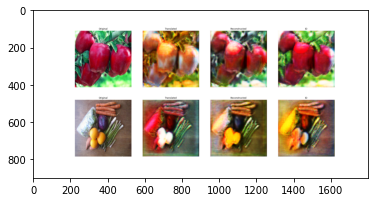

180


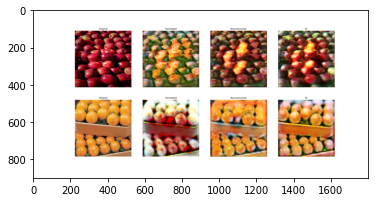

195


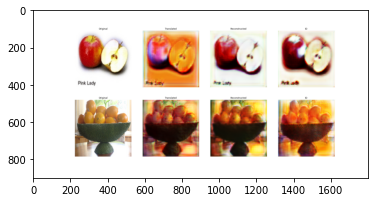

In [162]:
for sample in range(len(path_list)):
    if sample % 15 == 0:
        print(sample)
        show_image(sample)


Reference
- https://www.tensorflow.org/datasets/catalog/cycle_gan
- https://towardsdatascience.com/cyclegan-learning-to-translate-images-without-paired-training-data-5b4e93862c8d
- https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html